In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams.update({'font.size': 16,   # Sets default font size for texts
                     'axes.labelsize': 'medium',  # Sets font size for axis labels
                     'axes.titlesize': 'small',  # Sets font size for plot titles
                     'xtick.labelsize': 'small',  # Sets font size for x-axis tick labels
                     'ytick.labelsize': 'small',  # Sets font size for y-axis tick labels
                     'legend.fontsize': 'small',  # Sets font size for legend
                     'figure.titlesize': 'large'}) 

In [7]:
data=np.load('./Saved_Data/bubble_size_bt-Boiling-78-15W.npy', allow_pickle=True)

In [18]:
bchf=[]
hfs=[15,30,45,60,75]
for hf in hfs:
    data=np.load(f'./Saved_Data/bubble_size_bt-Boiling-78-{hf}W.npy', allow_pickle=True)
    bc=[]
    for i in range(len(data)):
        bc.append(len(data[i]))
    bchf.append(np.mean(bc))
    

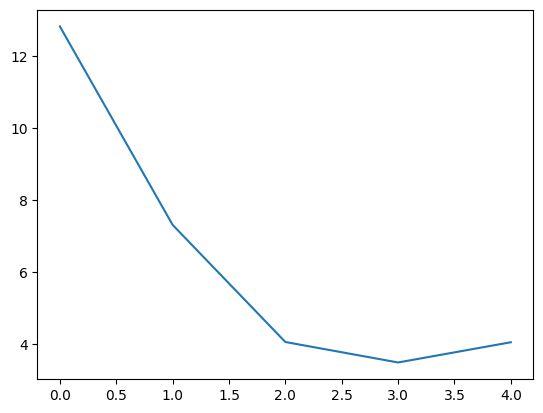

In [19]:
plt.plot(bchf)

In [4]:
boiling_test=78
#hfs78=[15,30,75,90,120]
hfs78=[15,30,45,60,75,90,105,120]

depart_mean78=[]
depart_std78=[]

for k in range(len(hfs78)):
    hf=hfs78[k]
    bubInd=np.load(f'./Saved_Data1/bubind_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
    frames=np.load(f'./Saved_Data1/frames_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
    bub_class=np.load(f'./Saved_Data1/bubclass_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
    length=3000*0.1 #frame rate by number of seconds to include
    total_frames=max(max(frames[i])for i in range(len(frames)))
    groups_amt=int(total_frames // length)
    counts=[]
    for j in range(groups_amt):
        count=0
        for i in range(len(frames)):
            mask=(np.array(frames[i]) > (j*length)) & (np.array(frames[i]) < length+(j*length))
            array=np.array(bub_class[i])[mask]
            if len(array) >= 2:
                if array[-1]-array[0] == 1:
                    count+=1
        counts.append(count)
    depart_mean78.append(np.mean(np.array(counts)/.1))
    depart_std78.append(np.std(np.array(counts)/.1))
    
hfs78=[13.9664, 27.6133, 41.2102, 54.4844, 67.7364, 80.7368, 93.9672, 102.6266];

In [9]:
boiling_test=114
hfs114=[15,30,45,60,75,90,105,120,135,150,180,195,214,235]
#hfs114=[15,30,75,90,105,120,150,165,214,235]
#hfs114=[15,60,90,120,165,235]

depart_mean114=[]
depart_std114=[]

for k in range(len(hfs114)):
    hf=hfs114[k]
    print(hf)
    bubInd=np.load(f'./Saved_Data1/bubind_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
    frames=np.load(f'./Saved_Data1/frames_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
    bub_class=np.load(f'./Saved_Data1/bubclass_Boiling-{boiling_test}-{hf}W.npy', allow_pickle=True)
   
            
    length=3000*0.1 #frame rate by number of seconds to include
    total_frames=max(max(frames[i])for i in range(len(frames)))
    groups_amt=int(total_frames // length)
    counts=[]
    for j in range(groups_amt):
        count=0
        for i in range(len(frames)):
            mask=(np.array(frames[i]) > (j*length)) & (np.array(frames[i]) < length+(j*length))
            array=np.array(bub_class[i])[mask]
            if len(array) >= 2:
                if array[-1]-array[0] == 1:
                    count+=1
        counts.append(count)
    depart_mean114.append(np.mean(np.array(counts)/.1))
    depart_std114.append(np.std(np.array(counts)/.1))
    
#hfs114=[9.999,24.0219,65.0031,78.3582,92.0728,105.6601,133.4850,147.0723,191.9670,203.4799]
hfs114=[9.999, 24.0219, 37.5729, 51.2022, 65.0031, 
 78.3582, 92.0728, 105.6601, 119.1277, 133.4850, 
  160.2275, 175.3686, 191.9670, 203.4799]

15
30
45
60
75
90
105
120
135
150
180
195
214
235


In [7]:
len(hfs114), len(depart_mean114)

(15, 14)

Text(0, 0.5, 'Departure Rate (Bubbles/s)')

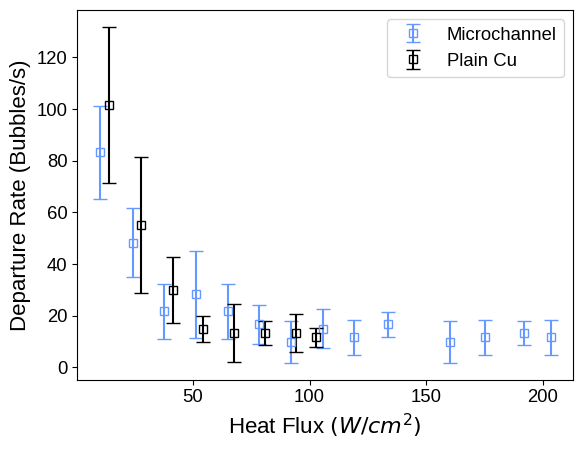

In [12]:
xerr114=[10 for i in range(len(hfs114))]
xerr78=[10 for i in range(len(hfs78))]
plt.errorbar(hfs114, depart_mean114, yerr=depart_std114, fmt='s', markerfacecolor='none',capsize=5, color='#6699FF' , label='Microchannel')
plt.errorbar(hfs78, depart_mean78, yerr=depart_std78, fmt='s', markerfacecolor='none',capsize=5, color='black' , label='Plain Cu')

plt.legend()
#plt.yscale('log')

plt.xlabel('Heat Flux $(W/cm^2)$')
plt.ylabel('Departure Rate (Bubbles/s)')

Text(0, 0.5, 'Departure Rate (Bubbles/s)')

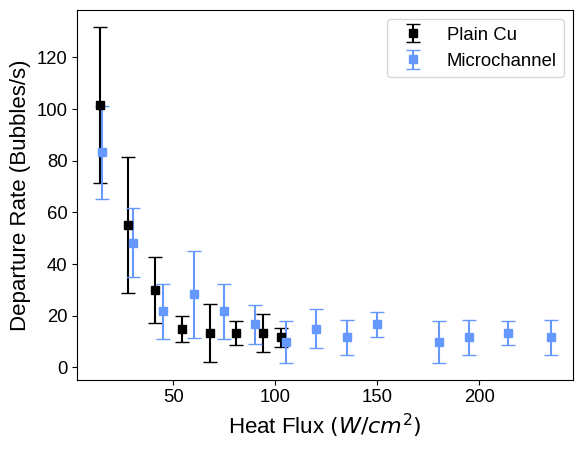

In [55]:
xerr114=[10 for i in range(len(hfs114))]
xerr78=[10 for i in range(len(hfs78))]
plt.errorbar(hfs78, depart_mean78, yerr=depart_std78, fmt='s', markerfacecolor='black',capsize=5, color='black' , label='Plain Cu')
plt.errorbar(hfs114, depart_mean114, yerr=depart_std114, fmt='s', markerfacecolor='#6699FF',capsize=5, color='#6699FF' , label='Microchannel')
plt.legend()
#plt.yscale('log')

plt.xlabel('Heat Flux $(W/cm^2)$')
plt.ylabel('Departure Rate (Bubbles/s)')

In [174]:
boiling_test=78
hfs78=[15,30,45,60,75,90,105]
bc_mean78=[]
bc_std78=[]
bc_all78=[]
for k in range(len(hfs78)):
    hf=hfs78[k]
    bs=np.load(f'./Saved_Data/bubble_size_bt-Boiling-78-{hf}W.npy', allow_pickle=True)
    # max bubble
    bc=[]
    for i in range(len(bs)):
        bc.append(len(bs[i]))
            
    bc_mean78.append(np.mean(np.array(bc)))
    bc_std78.append(np.std(np.array(bc)))
    bc_all78.append(np.array(bc))
    
hfs78=[13.9664, 27.6133, 41.2102, 54.4844, 67.7364, 80.7368, 93.9672];

In [175]:
boiling_test=114
hfs114=[15,30,45,60,75,90,105,120,135,150,180,195,214]
bc_mean114=[]
bc_std114=[]
bc_all114=[]
for k in range(len(hfs114)):
    hf=hfs114[k]
    bs=np.load(f'./Saved_Data/bubble_size_bt-Boiling-114-{hf}W.npy', allow_pickle=True)
    # max bubble
    bc=[]
    for i in range(len(bs)):
        bc.append(len(bs[i]))
            
    bc_mean114.append(np.mean(np.array(bc)))
    bc_std114.append(np.std(np.array(bc)))
    bc_all114.append(np.array(bc))


    
hfs114=[9.999, 24.0219, 37.5729, 51.2022, 65.0031, 
 78.3582, 92.0728, 105.6601, 119.1277, 133.4850, 
  160.2275, 175.3686, 191.9670]

Text(0, 0.5, 'Bubble Count')

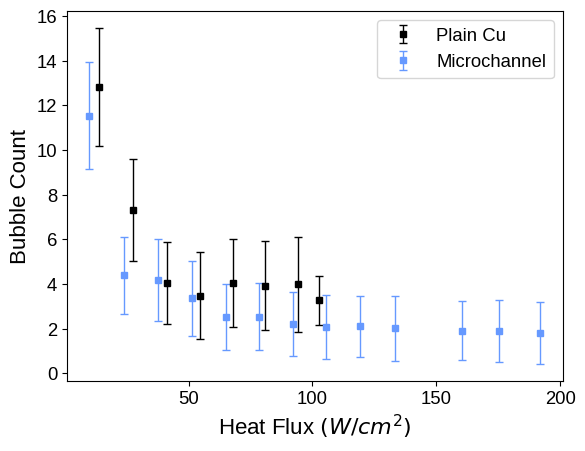

In [20]:
import matplotlib.pyplot as plt
xerr78=[10 for i in range(len(hfs78))]
xerr114=[10 for i in range(len(hfs114))]

plt.errorbar(hfs78, bc_mean78, yerr=bc_std78,
             fmt='s',markersize=5, markerfacecolor='black',capsize=3, linewidth=1,color='black', label='Plain Cu' )
plt.errorbar(hfs114, bc_mean114, yerr=bc_std114, fmt='s', markersize=5,markerfacecolor='#6699FF',capsize=3, linewidth=1, color='#6699FF' ,label='Microchannel')
plt.legend()
plt.xlabel(r'Heat Flux $(W/cm^2)$')
plt.ylabel('Bubble Count')

Text(0, 0.5, 'Bubble Count')

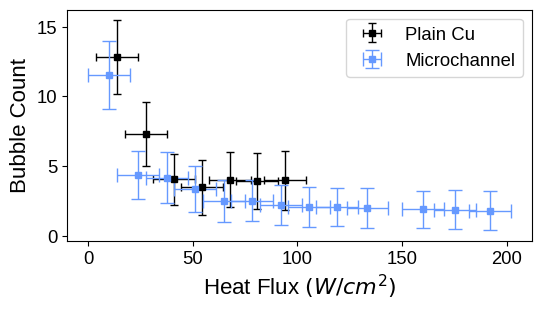

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3)) 

xerr78=[10 for i in range(len(hfs78))]
xerr114=[10 for i in range(len(hfs114))]

plt.errorbar(hfs78, bc_mean78, yerr=bc_std78,xerr=xerr78,
             fmt='s', markersize=5, markerfacecolor='black',capsize=3,linewidth=1, color='black', label='Plain Cu' )
plt.errorbar(hfs114, bc_mean114, yerr=bc_std114,xerr=xerr114, fmt='s', markersize=5,markerfacecolor='#6699FF',capsize=5, linewidth=1,color='#6699FF' ,label='Microchannel')
plt.legend()
plt.xlabel(r'Heat Flux $(W/cm^2)$')
plt.ylabel('Bubble Count')

In [177]:
boiling_test=78
hfs78=[15,30,45,60,75,90,105]
vf_mean78=[]
vf_std78=[]
vf_all78=[]
for k in range(len(hfs78)):
    hf=hfs78[k]
    vf=np.load(f'./Saved_Data/vapor_Boiling-78-{hf}W.npy')/(832*600)
    # max bubble
    
            
    vf_mean78.append(np.mean(np.array(vf)))
    vf_std78.append(np.std(np.array(vf)))
    vf_all78.append(np.array(vf))
    
hfs78=[13.9664, 27.6133, 41.2102, 54.4844, 67.7364, 80.7368, 93.9672];

In [178]:
boiling_test=114
hfs114=[15,30,45,60,75,90,105,120,135,150,180,195,214]
vf_mean114=[]
vf_std114=[]
vf_all114=[]
for k in range(len(hfs114)):
    hf=hfs114[k]
    vf=np.load(f'./Saved_Data/vapor_Boiling-114-{hf}W.npy')/(832*600)
    # max bubble
    
            
    vf_mean114.append(np.mean(np.array(vf)))
    vf_std114.append(np.std(np.array(vf)))
    vf_all114.append(np.array(vf))



hfs114=[9.999, 24.0219, 37.5729, 51.2022, 65.0031, 
 78.3582, 92.0728, 105.6601, 119.1277, 133.4850, 
  160.2275, 175.3686, 191.9670]

Text(0, 0.5, 'Vapor Fraction')

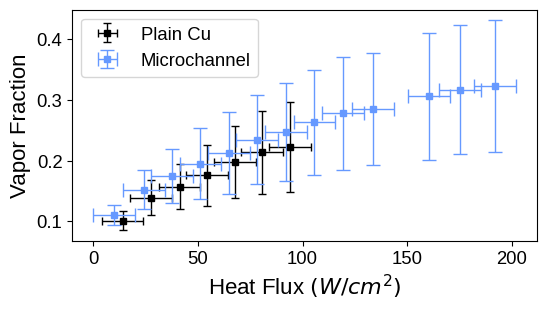

In [179]:
import matplotlib.pyplot as plt
xerr78=[10 for i in range(len(hfs78))]
xerr114=[10 for i in range(len(hfs114))]
plt.figure(figsize=(6, 3)) 

plt.errorbar(hfs78, vf_mean78, yerr=vf_std78,xerr=xerr78,
             fmt='s', markersize=5, markerfacecolor='black',capsize=3,linewidth=1, color='black', label='Plain Cu' )
plt.errorbar(hfs114, vf_mean114, yerr=vf_std114,xerr=xerr114, fmt='s', markersize=5,markerfacecolor='#6699FF',capsize=5, linewidth=1,color='#6699FF' ,label='Microchannel')
plt.legend()
plt.xlabel(r'Heat Flux $(W/cm^2)$')
plt.ylabel('Vapor Fraction')

### Transient cases: bubble count and vapor fraction

In [29]:
def plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart ):
    bs=np.load(bs_path, allow_pickle=True)
    count=[]
    for i in range(len(bs)):
        count.append(len(bs[i])) 
    df=pd.DataFrame(data=count)
    
    time=[(i/150)+vidstart for i in range(len(count))]
    df['value']=df.iloc[:,0].rolling(window=300).mean()
    plt.figure(figsize=(5,10))
    fig, ax1=plt.subplots(figsize=(6,2))
    ax1.plot(time, df, color='lightgray')
    ax1.plot(time, df['value'], color='darkblue', label='Rolling Average')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Bubble Count')
    ax1.legend()
    plt.show()
    
        # Load Temperature and Convert to Heat Flux: 
    temp_data=np.loadtxt(temp_path, skiprows=23)
    temp_time=temp_data[:,0]
    temp_time=temp_data[:,0]
    temp1=temp_data[:,3]
    temp2=temp_data[:,2]
    temp3=temp_data[:,4]
    temp4=temp_data[:,1]
    temp=np.transpose(np.array([temp1,temp2,temp3,temp4]))
    plt.figure(figsize=(6, 2)) 
    #Calculating heat flux
    tc_loc=np.array([0, 2.54, 5.08, 7.62])
    tc_loc=tc_loc*.001
    n=4
    k=392
    slope_d=n*np.sum(np.power(tc_loc,2))-np.sum(tc_loc)**2
    slope=(n*np.dot(temp,tc_loc)-np.sum(tc_loc)*np.sum(temp,axis=1))/slope_d
    hf=-k*slope/10000
    temp_time=temp_time+tempstart
    plt.xlabel("Time")
    plt.ylabel("Heat Flux")
    plt.plot(temp_time, hf, color='darkblue')
    plt.show()
    
    vf=np.load(vf_path)/(832*600)
    df=pd.DataFrame(data=vf)
    df['value']=df.iloc[:,0].rolling(window=300).mean()
    plt.figure(figsize=(5,10))
    fig, ax1=plt.subplots(figsize=(6,2))
    ax1.plot(time, df, color='lightgray')
    ax1.plot(time, df['value'], color='darkblue', label='Rolling Average')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Vapor Fraction')
    ax1.legend()
    plt.show()
    
    hfmatch=np.interp(time,temp_time,hf)
    sortin=np.argsort(hfmatch)
    df=pd.DataFrame(data=vf[sortin])
    df['value']=df.iloc[:,0].rolling(window=1000).mean()
    plt.figure(figsize=(10,10))
    fig, ax1=plt.subplots(figsize=(6,6))
    ax1.plot(hfmatch[sortin], df, color='lightgray')
    ax1.plot(hfmatch[sortin], df['value'], color='darkblue', label='Rolling Average')
    ax1.set_xlabel('Heat Flux')
    ax1.set_ylabel('Vapor Fraction')
    ax1.legend()
    plt.show()
    
    hfmatch=np.interp(time,temp_time,hf)
    sortin=np.argsort(hfmatch)
    df=pd.DataFrame(data=np.array(count)[sortin])
    df['value']=df.iloc[:,0].rolling(window=1000).mean()
    plt.figure(figsize=(10,10))
    fig, ax1=plt.subplots(figsize=(6,6))
    ax1.plot(hfmatch[sortin], df, color='lightgray')
    ax1.plot(hfmatch[sortin], df['value'], color='darkblue', label='Rolling Average')
    ax1.set_xlabel('Heat Flux')
    ax1.set_ylabel('Bubble Count')
    ax1.legend()
    plt.show()




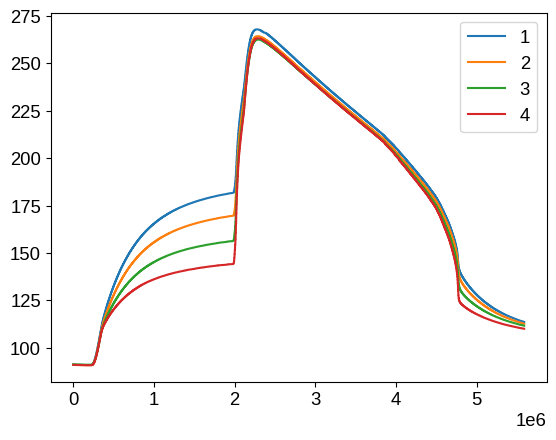

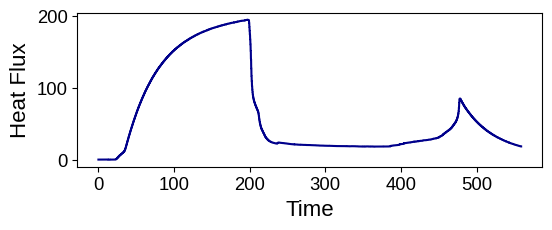

In [15]:
temp_data=np.loadtxt(temp_path, skiprows=23)
temp_time=temp_data[:,0]
temp1=temp_data[:,3]
temp2=temp_data[:,2]
temp3=temp_data[:,4]
temp4=temp_data[:,1]
plt.plot(temp1,label='1')
plt.plot(temp2,label='2')
plt.plot(temp3,label='3')
plt.plot(temp4,label='4')
plt.legend()
plt.show()
temp=np.transpose(np.array([temp1,temp2,temp3,temp4]))
plt.figure(figsize=(6, 2)) 
#Calculating heat flux
tc_loc=np.array([0, 2.54, 5.08, 7.62])
tc_loc=tc_loc*.001
n=4
k=392
slope_d=n*np.sum(np.power(tc_loc,2))-np.sum(tc_loc)**2
slope=(n*np.dot(temp,tc_loc)-np.sum(tc_loc)*np.sum(temp,axis=1))/slope_d
hf=-k*slope/10000
temp_time=temp_time+tempstart
plt.xlabel("Time")
plt.ylabel("Heat Flux")
plt.plot(temp_time, hf, color='darkblue')
plt.show()

<Figure size 500x1000 with 0 Axes>

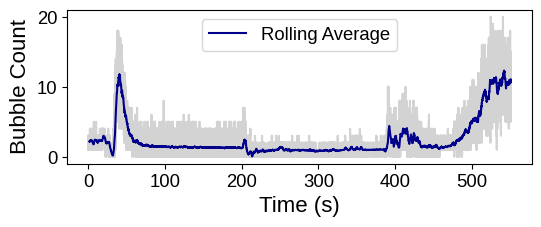

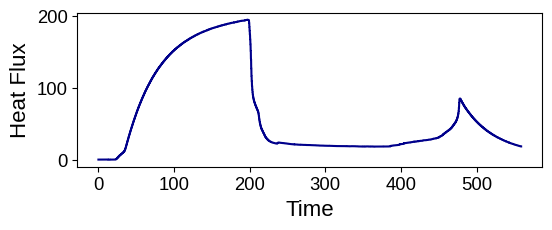

<Figure size 500x1000 with 0 Axes>

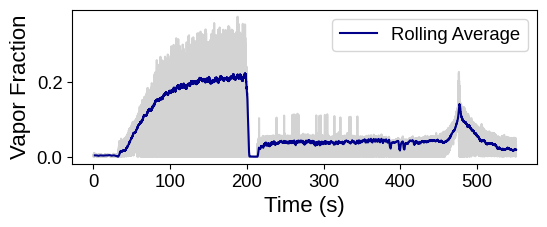

In [17]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-124-2.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-124/Test 2/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-124-2.npy"
tempstart=0
vidstart=0
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

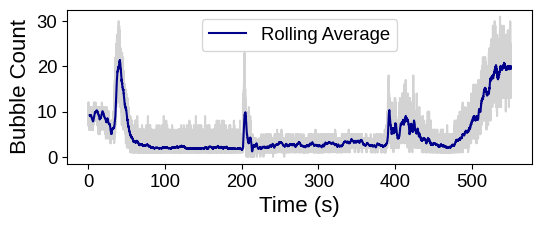

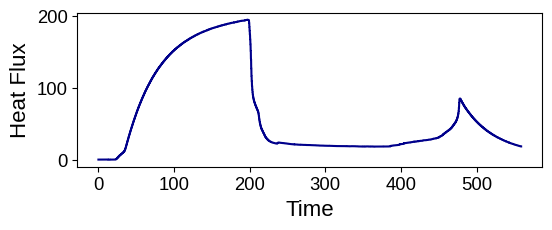

<Figure size 500x1000 with 0 Axes>

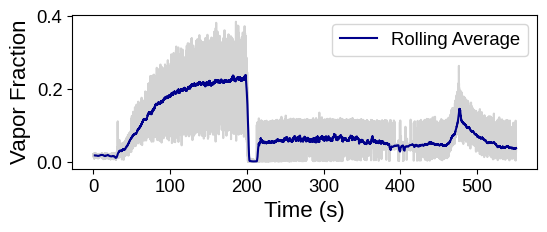

In [19]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-124-2-75.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-124/Test 2/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-124-2-75.npy"
tempstart=0
vidstart=0
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

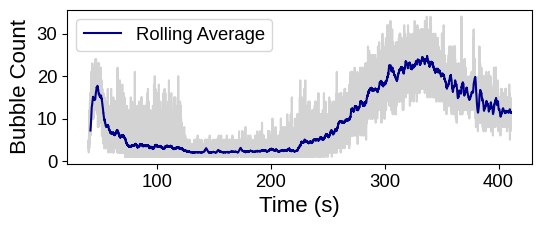

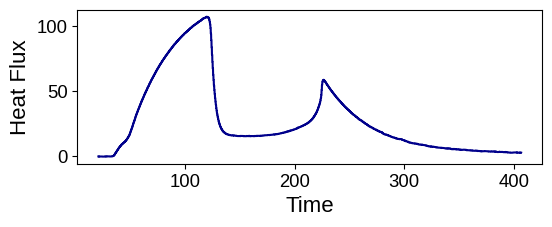

<Figure size 500x1000 with 0 Axes>

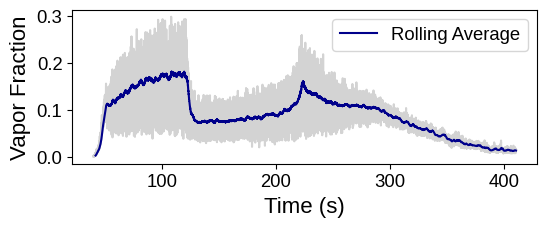

In [161]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-91.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-91/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-91.npy"
tempstart=20.718
vidstart=21.324+(2755/150)
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

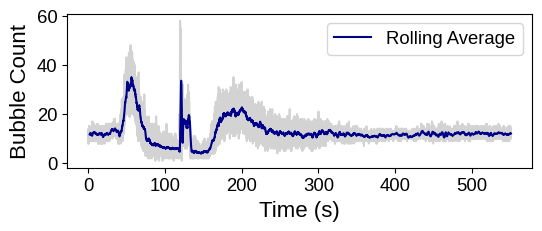

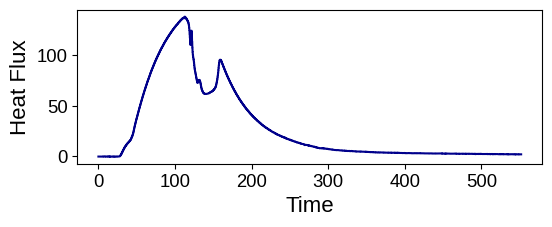

<Figure size 500x1000 with 0 Axes>

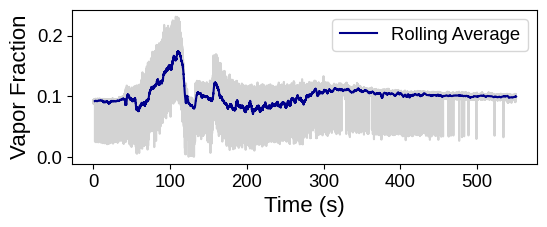

<Figure size 1000x1000 with 0 Axes>

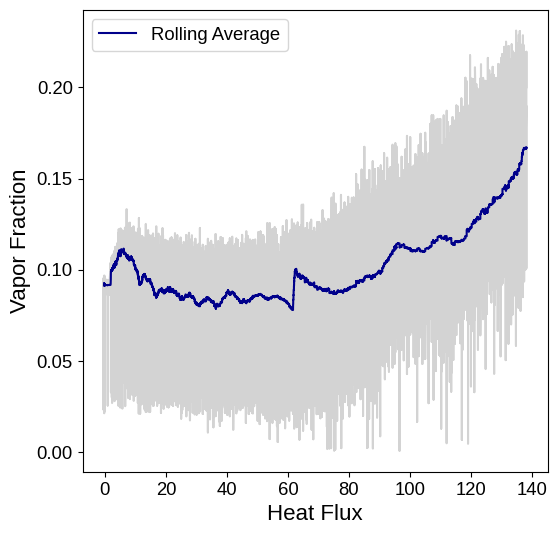

<Figure size 1000x1000 with 0 Axes>

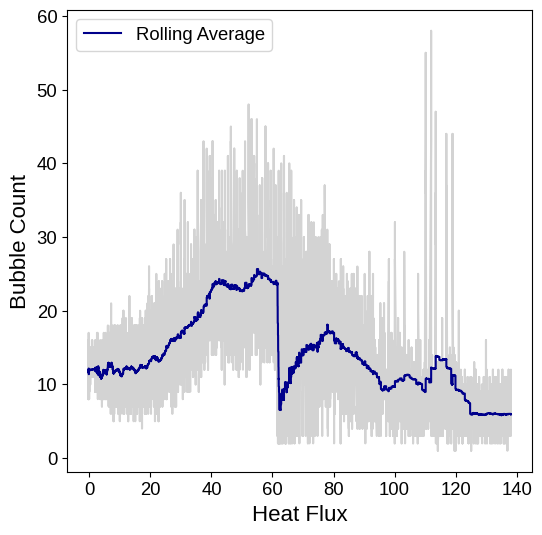

In [30]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-128.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-128/Temperature.lvm"
vf_path='./Saved_Data/vapor_Boiling-128.npy'
tempstart=0
vidstart=0
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

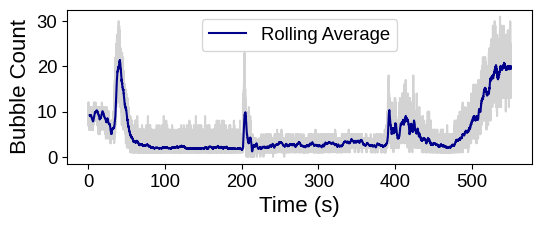

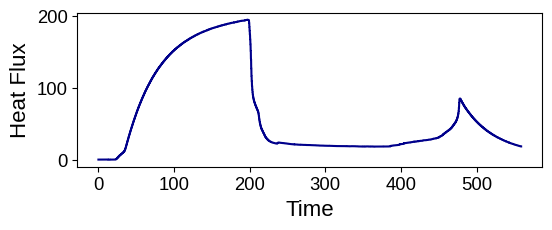

<Figure size 500x1000 with 0 Axes>

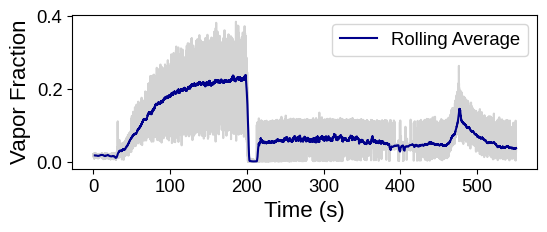

<Figure size 1000x1000 with 0 Axes>

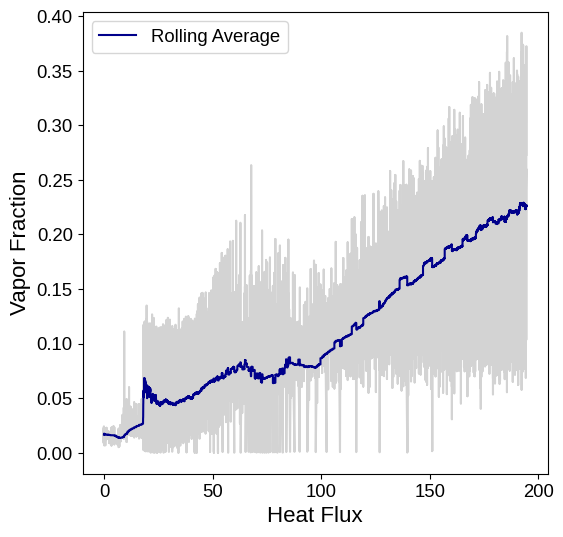

<Figure size 1000x1000 with 0 Axes>

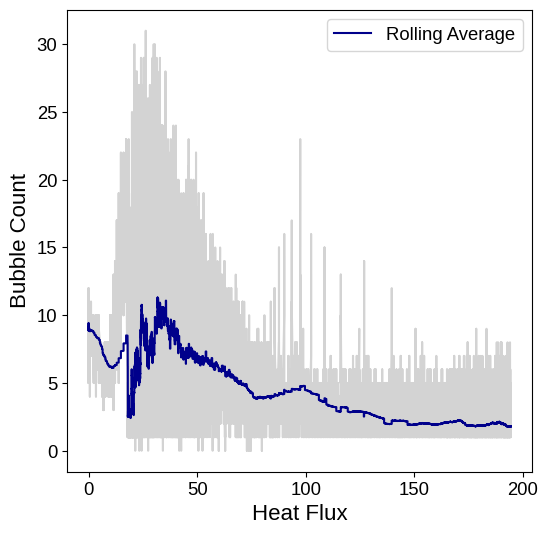

In [31]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-124-2-75.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-124/Test 2/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-124-2-75.npy"
tempstart=0
vidstart=0
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

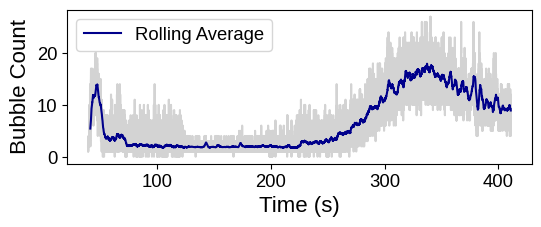

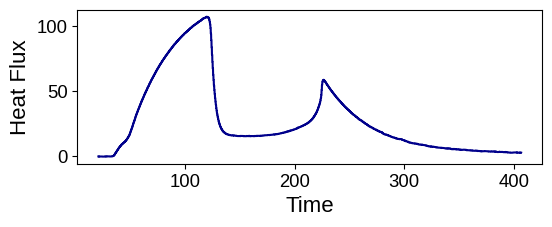

<Figure size 500x1000 with 0 Axes>

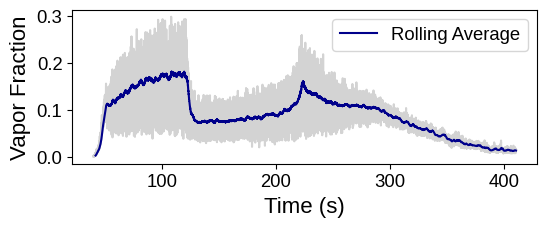

In [160]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-91-1.npy'
temp_path="/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-91/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-91.npy"
tempstart=20.718
vidstart=21.324+(2755/150)
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

<Figure size 500x1000 with 0 Axes>

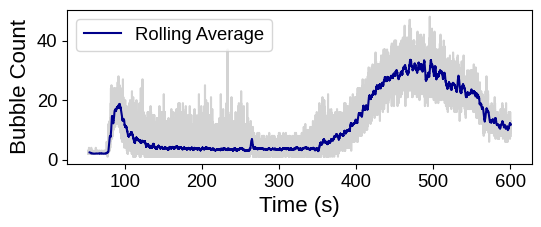

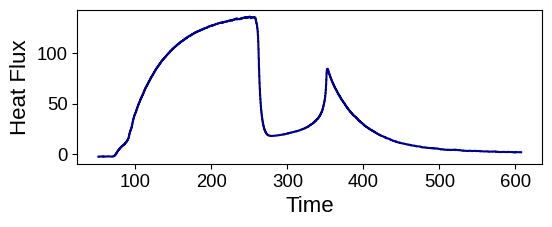

<Figure size 500x1000 with 0 Axes>

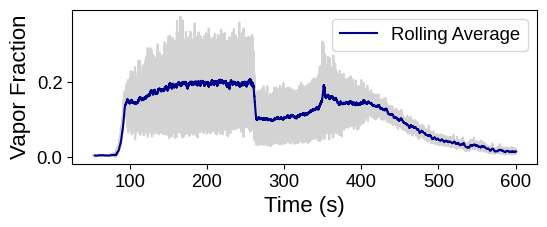

In [150]:
bs_path='./Saved_Data/bubble_size_bt-Boiling-87-1.npy'
temp_path="/mnt/share/zdrive/Christy/Boiling-Data/87/Temperature.lvm"
vf_path="./Saved_Data/vapor_Boiling-87-1.npy"
tempstart=51.43
vidstart=52.519
plot_bc(bs_path, temp_path,vf_path, tempstart, vidstart )

In [109]:

bs=np.load(f'./Saved_Data/bubble_size_bt-Boiling-91.npy', allow_pickle=True)
count=[]
for i in range(len(bs)):
    count.append(len(bs[i]))

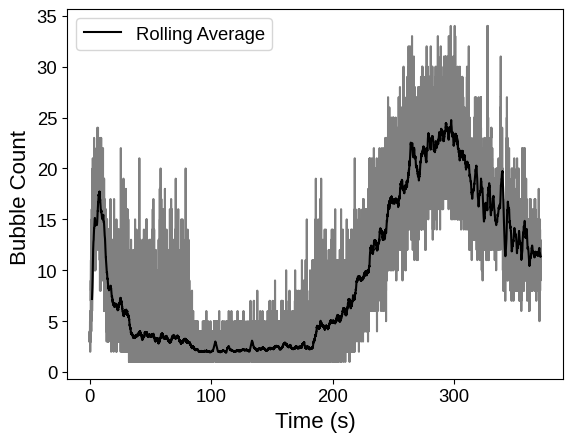

In [113]:
df=pd.DataFrame(data=count)
time=[i/150 for i in range(len(count))]
df['value']=df.iloc[:,0].rolling(window=300).mean()
plt.plot(time, df, color='gray')
plt.plot(time,df['value'] ,color='black', label='Rolling Average')
plt.xlabel('Time (s)')
plt.ylabel('Bubble Count ')
plt.legend()
#plt.plot(temp_time, hf)

<Figure size 500x1000 with 0 Axes>

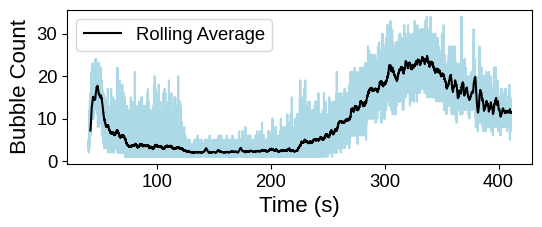

In [122]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(time, df, color='lightblue')
ax1.plot(time, df['value'], color='black', label='Rolling Average')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bubble Count')
ax1.legend()


In [123]:
len(time)

55676

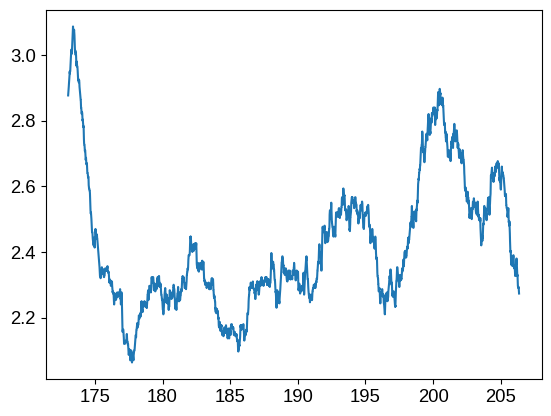

In [125]:
plt.plot(time[20000:25000], df['value'][20000:25000])

Text(0, 0.5, 'Bubble Count')

<Figure size 500x1000 with 0 Axes>

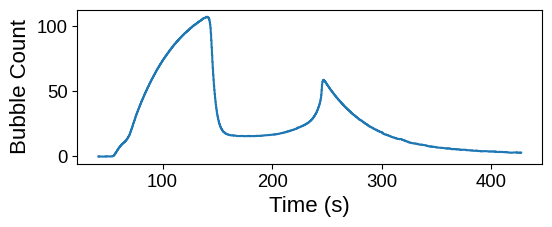

In [120]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(temp_time, hf)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bubble Count')


In [27]:

bs=np.load(f'./Saved_Data/bubble_size_bt-Boiling-87.npy', allow_pickle=True)
count=[]
for i in range(len(bs)):
    count.append(len(bs[i]))

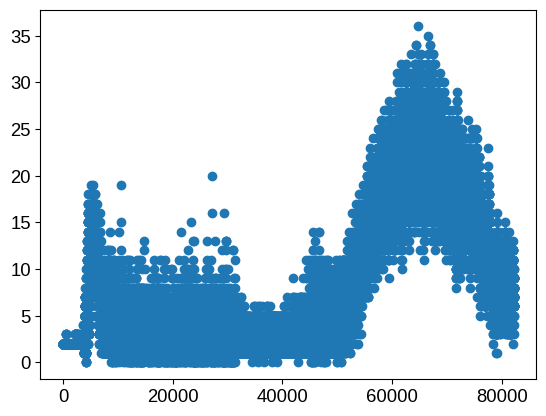

In [93]:
plt.plot(count,'o')

In [29]:
import pandas as pd

In [30]:
df=pd.DataFrame(data=count)

In [34]:
df['value']=df.iloc[:,0].rolling(window=300).mean()

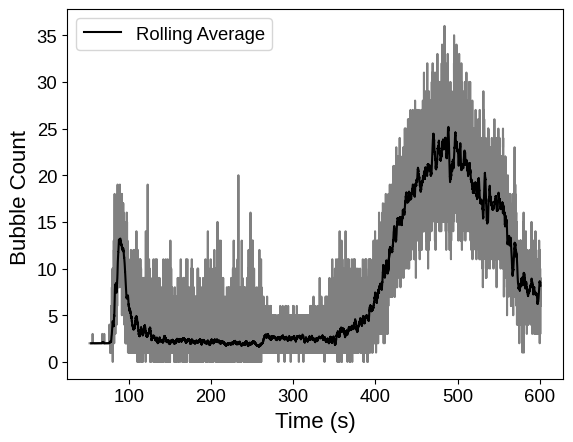

In [49]:
plt.plot(time, df, color='gray')
plt.plot(time,df['value'] ,color='black', label='Rolling Average')
plt.xlabel('Time (s)')
plt.ylabel('Bubble Count ')
plt.legend()
#plt.plot(temp_time, hf)

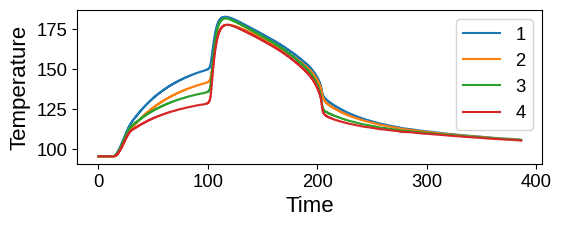

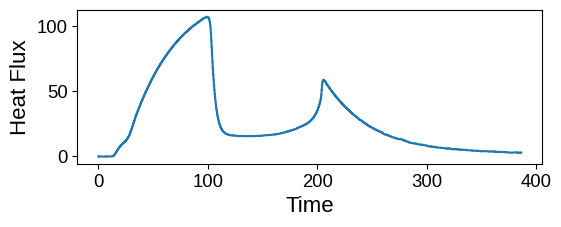

In [116]:
# Load Temperature and Convert to Heat Flux: 
temp_data=np.loadtxt("/mnt/share/zdrive/Hari/High Speed Video for Pool Boiling/Boiling-91/Temperature.lvm", skiprows=23)
temp_time=temp_data[:,0]
temp4=temp_data[:,1]
temp2=temp_data[:,2]
temp3=temp_data[:,3]
temp1=temp_data[:,4]
plt.figure(figsize=(6, 2)) 
plt.plot(temp_time, temp1,label='1')
plt.plot(temp_time, temp2,label='2')
plt.plot(temp_time, temp3, label='3')
plt.plot(temp_time, temp4,label='4')
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.legend()
plt.show()

temp=np.transpose(np.array([temp1,temp2,temp3,temp4]))
plt.figure(figsize=(6, 2)) 
#Calculating heat flux
tc_loc=np.array([0, 2.54, 5.08, 7.62])
tc_loc=tc_loc*.001
n=4
k=392
slope_d=n*np.sum(np.power(tc_loc,2))-np.sum(tc_loc)**2
slope=(n*np.dot(temp,tc_loc)-np.sum(tc_loc)*np.sum(temp,axis=1))/slope_d
hf=-k*slope/10000
plt.xlabel("Time")
plt.ylabel("Heat Flux")
plt.plot(temp_time, hf)

In [118]:
temp_time=temp_time+20.718
time=np.array(time)+21.324+(2755/150)

<Figure size 500x1000 with 0 Axes>

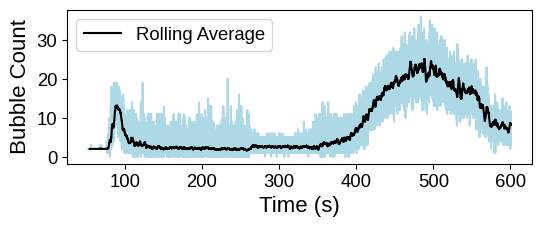

In [81]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(time, df, color='lightblue')
ax1.plot(time, df['value'], color='black', label='Rolling Average')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bubble Count')
ax1.legend()


Text(0, 0.5, 'Heat Flux $(W/cm^2)$')

<Figure size 500x1000 with 0 Axes>

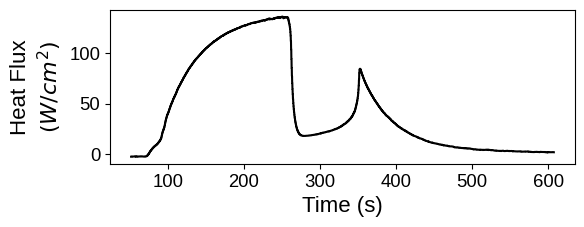

In [80]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(temp_time, hf, color='black')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel(r'Heat Flux $(W/cm^2)$', wrap=True)


(215.01933333333332, 306.6786666666667, 1.5876666666666666, 3.0323333333333333)

<Figure size 500x1000 with 0 Axes>

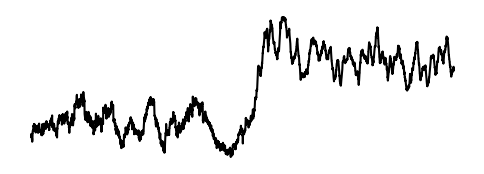

In [71]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(time[25000:37500], df['value'][25000:37500], color='black', label='Rolling Average')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bubble Count')
ax1.axis('off')

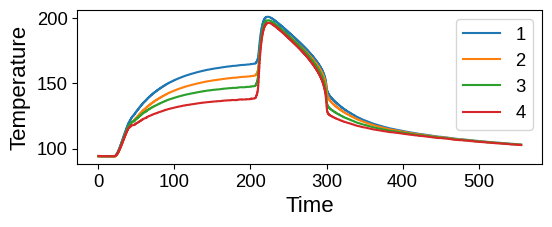

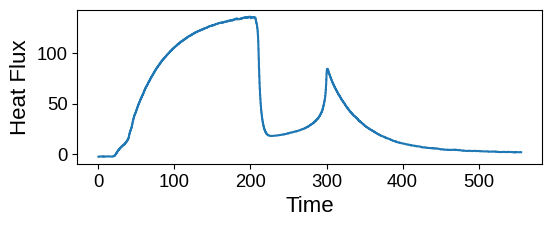

In [36]:
# Load Temperature and Convert to Heat Flux: 
temp_data=np.loadtxt("/mnt/share/zdrive/Christy/Boiling-Data/87/Temperature.lvm", skiprows=23)
temp_time=temp_data[:,0]
temp4=temp_data[:,1]
temp2=temp_data[:,2]
temp3=temp_data[:,3]
temp1=temp_data[:,4]
plt.figure(figsize=(6, 2)) 
plt.plot(temp_time, temp1,label='1')
plt.plot(temp_time, temp2,label='2')
plt.plot(temp_time, temp3, label='3')
plt.plot(temp_time, temp4,label='4')
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.legend()
plt.show()

temp=np.transpose(np.array([temp1,temp2,temp3,temp4]))
plt.figure(figsize=(6, 2)) 
#Calculating heat flux
tc_loc=np.array([0, 2.54, 5.08, 7.62])
tc_loc=tc_loc*.001
n=4
k=392
slope_d=n*np.sum(np.power(tc_loc,2))-np.sum(tc_loc)**2
slope=(n*np.dot(temp,tc_loc)-np.sum(tc_loc)*np.sum(temp,axis=1))/slope_d
hf=-k*slope/10000
plt.xlabel("Time")
plt.ylabel("Heat Flux")
plt.plot(temp_time, hf)

In [37]:
temp_time=temp_time+(51.43)

In [38]:
time=np.array([i/150 for i in range(len(count))])+52.519

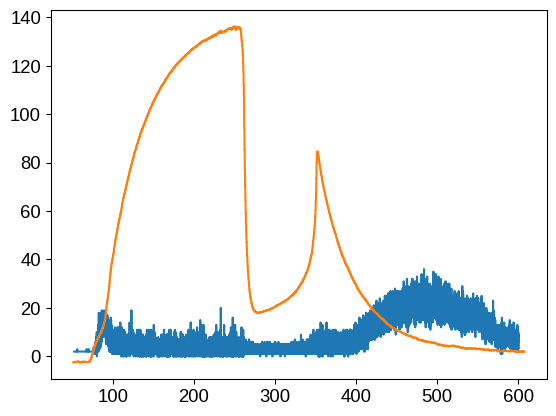

In [92]:
plt.plot(time, count)
plt.plot(temp_time, hf)

In [101]:
vf=np.load("./Saved_Data/vapor_Boiling-87-1.npy")/(832*600)

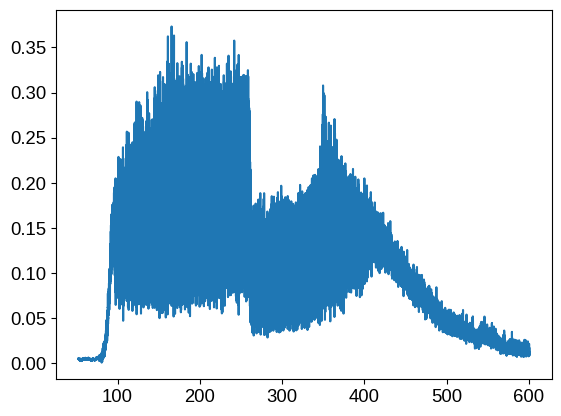

In [102]:
plt.plot(time,vf)

In [103]:
df=pd.DataFrame(data=vf)
df['value']=df.iloc[:,0].rolling(window=300).mean()

Text(0, 0.5, 'Heat Flux')

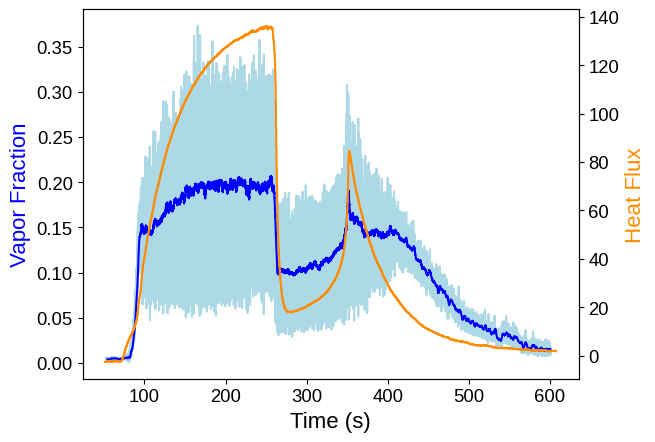

In [104]:
fig, ax1=plt.subplots()
ax1.plot(time, df, color='lightblue')
ax1.plot(time, df['value'], color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Vapor Fraction', color='b')

ax2=ax1.twinx()

ax2.plot(temp_time, hf, color='darkorange')
ax2.set_ylabel('Heat Flux', color='darkorange')


<Figure size 500x1000 with 0 Axes>

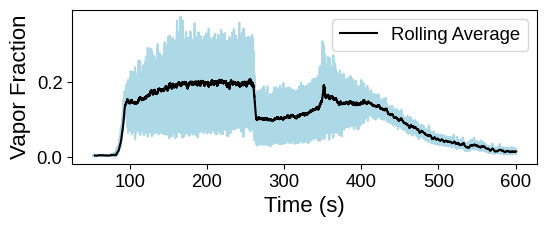

In [105]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(time, df, color='lightblue')
ax1.plot(time, df['value'], color='black', label='Rolling Average')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Vapor Fraction')
ax1.legend()


<Figure size 500x1000 with 0 Axes>

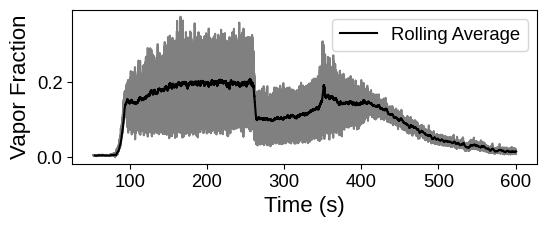

In [107]:
plt.figure(figsize=(5,10))
fig, ax1=plt.subplots(figsize=(6,2))
ax1.plot(time, df, color='gray')
ax1.plot(time, df['value'], color='black', label='Rolling Average')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Vapor Fraction')
ax1.legend()
